## Импорт библиотек

In [19]:
import pandas as pd
import numpy as np
import csv 
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm
import matplotlib.pyplot as plt 

## Импорт данных

In [20]:
main = pd.read_csv("f1_data.csv")
main.drop('Unnamed: 0', axis= 1, inplace= True)
main

,season,round,circuit_id,country,driver,nationality,constructor,podium,driver_points,driver_wins,driver_position,constructor_points,constructor_wins,constructor_position,driver_age
0,2012,1,albert_park,Australia,button,British,mclaren,1,25,1,1,0,0,0,32
1,2012,1,albert_park,Australia,button,British,mclaren,1,25,1,1,0,0,0,32
2,2012,1,albert_park,Australia,button,British,mclaren,1,25,1,1,0,0,0,32
3,2012,1,albert_park,Australia,button,British,mclaren,1,25,1,1,0,0,0,32
4,2012,1,albert_park,Australia,button,British,mclaren,1,25,1,1,0,0,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9812,2023,22,yas_marina,UAE,sargeant,American,williams,16,0,0,0,28,0,7,22
9813,2023,22,yas_marina,UAE,zhou,Chinese,alfa,17,0,0,0,16,0,9,24
9814,2023,22,yas_marina,UAE,sainz,Spanish,ferrari,18,0,0,0,406,1,3,29
9815,2023,22,yas_marina,UAE,bottas,Finnish,alfa,19,0,0,0,16,0,9,34


### Функция regression оценивает точность предсказаний модели на данных о гонках за сезон 2023 и возвращает средний балл точности модели

In [21]:
def regression(model):
    score = 0
    for circuit in main[main.season == 2023]['round'].unique():

        test = main[(main.season == 2023) & (main['round'] == circuit)]
        X_test = test.drop(['driver', 'podium', 'circuit_id', 'country', 'nationality', 'constructor'], axis = 1)
        y_test = test.podium

        X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

        pred = pd.DataFrame(model.predict(X_test), columns = ['results'])
        pred['podium'] = y_test.reset_index(drop = True)
        pred['actual'] = pred.podium.map(lambda x: 1 if x == 1 else 0)
        pred.sort_values('results', ascending = True, inplace = True)
        pred.reset_index(inplace = True, drop = True)
        pred['predicted'] = pred.index
        pred['predicted'] = pred.predicted.map(lambda x: 1 if x == 0 else 0)

        score += precision_score(pred.actual, pred.predicted)

    model_score = score / main[main.season == 2023]['round'].unique().max()
    return model_score

### Создание обучающей и тестовой выборки

In [22]:
train = main[main.season <2023]
X_train = train.drop(['driver', 'podium', 'circuit_id', 'country', 'nationality', 'constructor'], axis = 1)
y_train = train.podium
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

In [23]:
compare=defaultdict(list)

### Линейная регрессия

In [24]:
parameters={'intercept': [True, False]}

for intercept in parameters['intercept']:
    model_params = (intercept)
    model1 = LinearRegression(fit_intercept = intercept)
    model1.fit(X_train, y_train)
            
    model_score = regression(model1)
            
    compare['Reg_Model'].append('linear_regression')
    compare['Reg_Params'].append(model_params)
    compare['Reg_Score'].append(model_score)

### Метрики Линейной регрессии

In [25]:
predictions = model1.predict(X_train)
R2score=r2_score(y_train, predictions)
print('R² Value:', R2score)
print('Intercept:', model1.intercept_)

MSE = metrics.mean_squared_error(y_train, predictions)
print('Mean squared error:', MSE)

RMSE = np.sqrt(metrics.mean_squared_error(y_train, predictions))
print('Root mean squared error:', RMSE)

print('Coefficient:', model1.coef_)

R² Value: -2.6477897045718946
Intercept: 0.0
Mean squared error: 134.86290351564847
Root mean squared error: 11.613048846691745
Coefficient: [-0.52773143  1.67404081 -2.6113239   0.71882988  2.51972538 -1.83548345
 -0.05241843  1.16933315  0.22564346]


### ROC-кривая для линейной регрессии

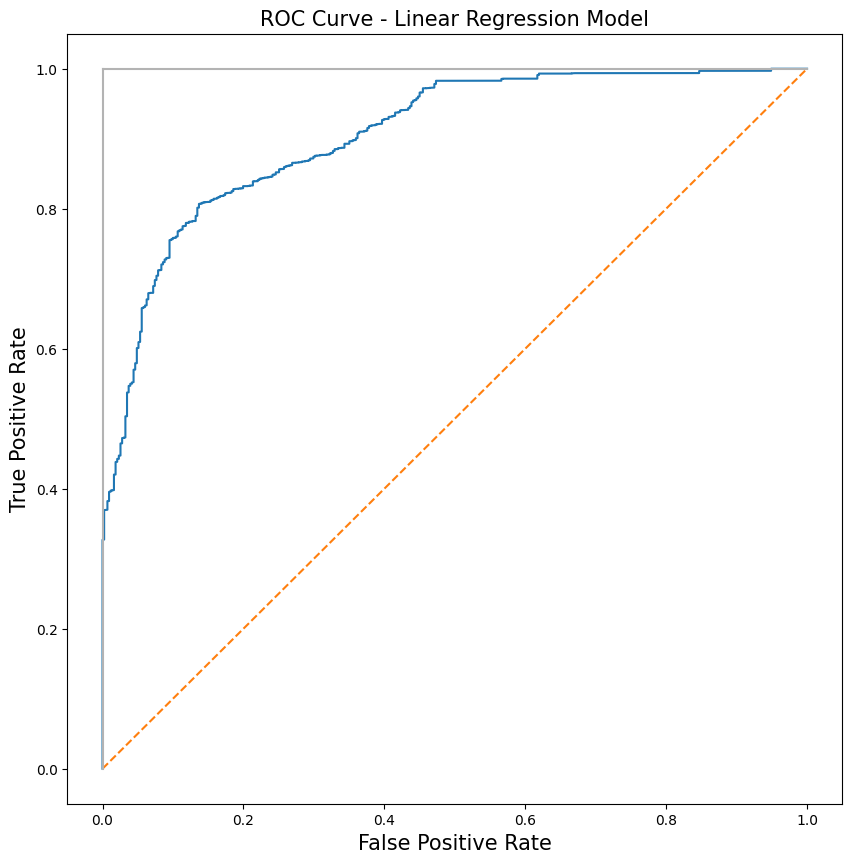

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions, pos_label=2)
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve - Linear Regression Model', fontsize=15)
plt.plot(tpr, fpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.show()

### Реальные и предсказанные значения для линейной регрессии

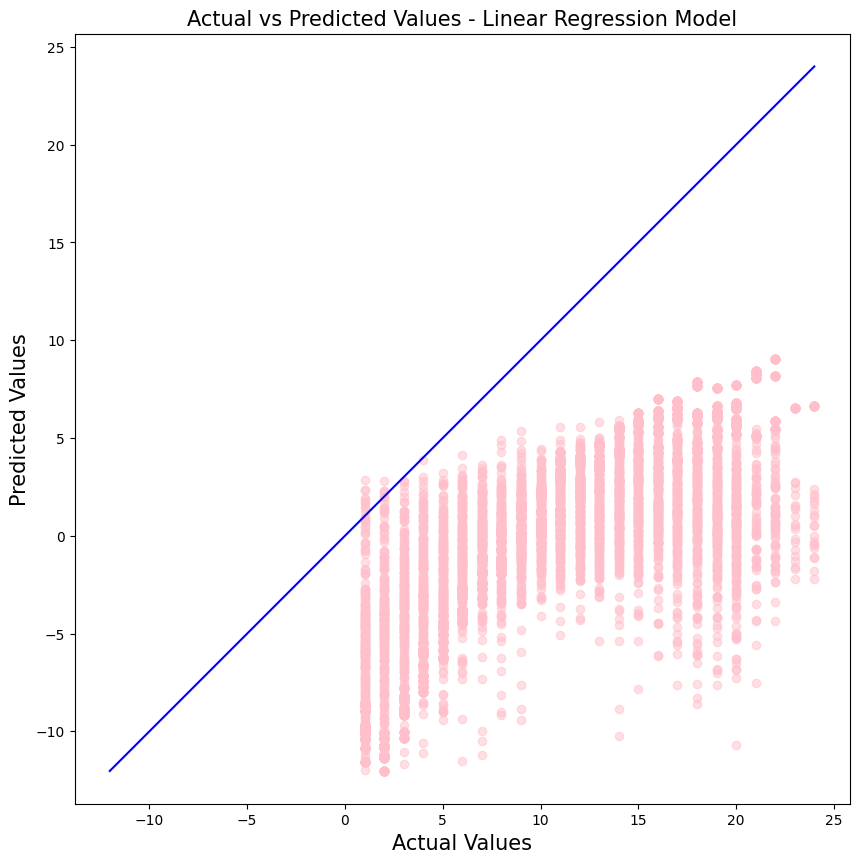

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(y_train, predictions, c='pink', alpha=0.5)
plt.yscale('linear')
plt.xscale('linear')
p1 = max(max(predictions), max(y_train))
p2 = min(min(predictions), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title('Actual vs Predicted Values - Linear Regression Model', fontsize=15)
plt.axis('equal')
plt.show()

### Случайный лес

In [28]:
parameters={'criterion': ['friedman_mse'],
        'max_features': [0.8, None],
        'max_depth': list(np.linspace(5, 55, 26, dtype=int)) + [None]}

for criterion in parameters['criterion']:
    for max_features in parameters['max_features']:
        for max_depth in parameters['max_depth']:
            model_params = (criterion, max_features, max_depth)
            model2 = RandomForestRegressor(criterion = criterion, max_features = max_features, max_depth = max_depth, random_state = 1)
            model2.fit(X_train, y_train)
            
            model_score = regression(model2)
            
            compare['Reg_Model'].append('random_forest_regressor')
            compare['Reg_Params'].append(model_params)
            compare['Reg_Score'].append(model_score)

### Метрики для случайного леса

In [58]:
predictions = model2.predict(X_train)
R2score=r2_score(y_train, predictions)
print('R² Value:', R2score)
MSE = metrics.mean_squared_error(y_train, predictions)
print('Mean squared error:', MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_train, predictions))
print('Root mean squared error:', RMSE)

R² Value: 0.9213359835911107
Mean squared error: 2.908297493632651
Root mean squared error: 1.7053731244606416


### ROC-кривая для случайного леса

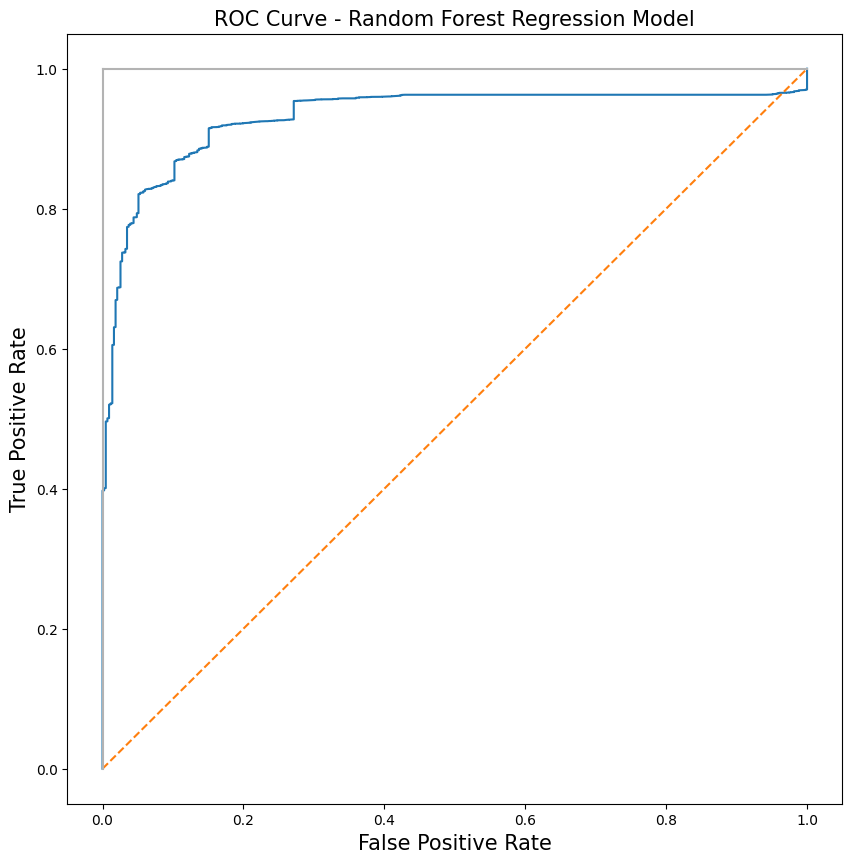

In [59]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions, pos_label=2)
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve - Random Forest Regression Model', fontsize=15)
plt.plot(tpr, fpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.show()

### Реальные и предсказанные значения для случайного леса

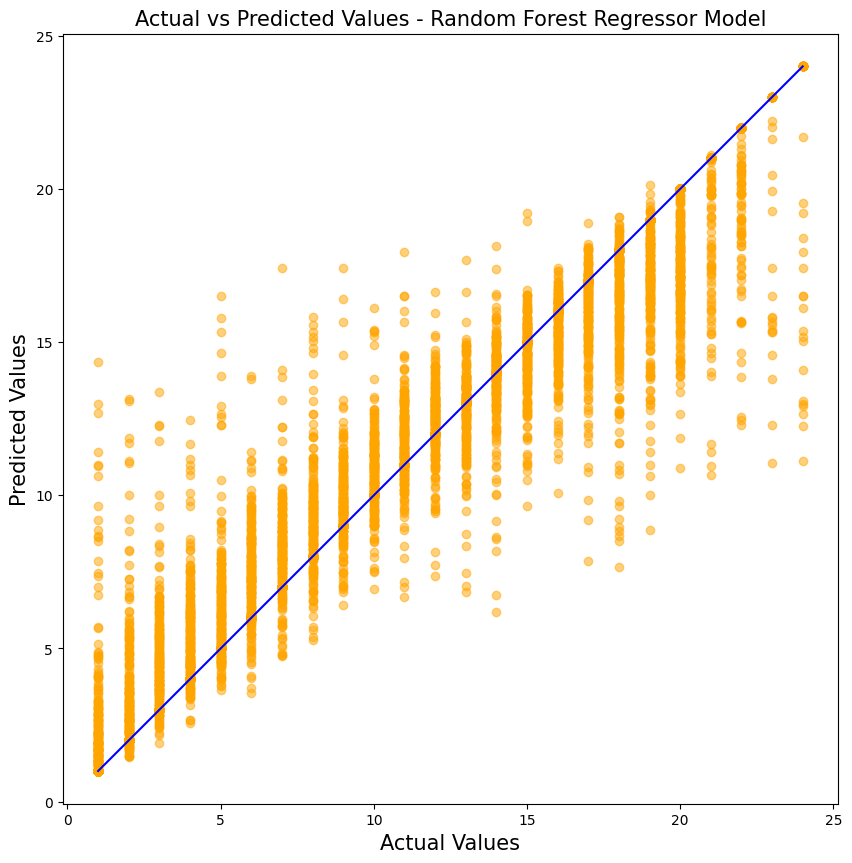

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(y_train, predictions, c='orange', alpha=0.5)
plt.yscale('linear')
plt.xscale('linear')
p1 = max(max(predictions), max(y_train))
p2 = min(min(predictions), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title('Actual vs Predicted Values - Random Forest Regressor Model', fontsize=15)
plt.axis('equal')
plt.show()

### Метод опорных векторов

In [61]:
parameters={'gamma': np.logspace(-4, -1, 10),
        'C': np.logspace(-2, 1, 10),
        'kernel': ['rbf']} 

for gamma in parameters['gamma']:
    for c in parameters['C']:
        for kernel in parameters['kernel']:
            model_params = (gamma, c, kernel)
            model3 = svm.SVR(gamma = gamma, C = c, kernel = kernel)
            model3.fit(X_train, y_train)
            
            model_score = regression(model3)
            
            compare['Reg_Model'].append('svm_regressor')
            compare['Reg_Params'].append(model_params)
            compare['Reg_Score'].append(model_score)

### Метрики для метода опорных векторов

In [62]:
predictions = model3.predict(X_train)
R2score=r2_score(y_train, predictions)
print('R² Value:', R2score)
MSE = metrics.mean_squared_error(y_train, predictions)
print('Mean squared error:', MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_train, predictions))
print('Root mean squared error:', RMSE)

R² Value: 0.6824261184368298
Mean squared error: 11.7410649234151
Root mean squared error: 3.426523737465582


### ROC-кривая для метода опорных векторов

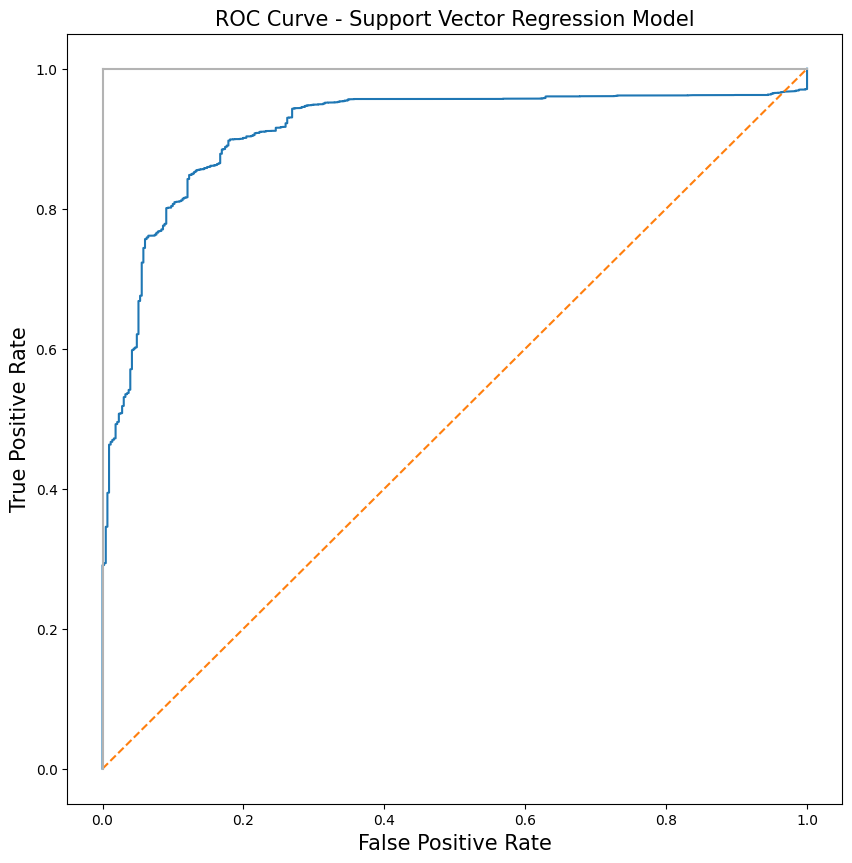

In [63]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions, pos_label=2)
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve - Support Vector Regression Model', fontsize=15)
plt.plot(tpr, fpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.show()

### Реальные и предсказанные значения для метода опорных векторов

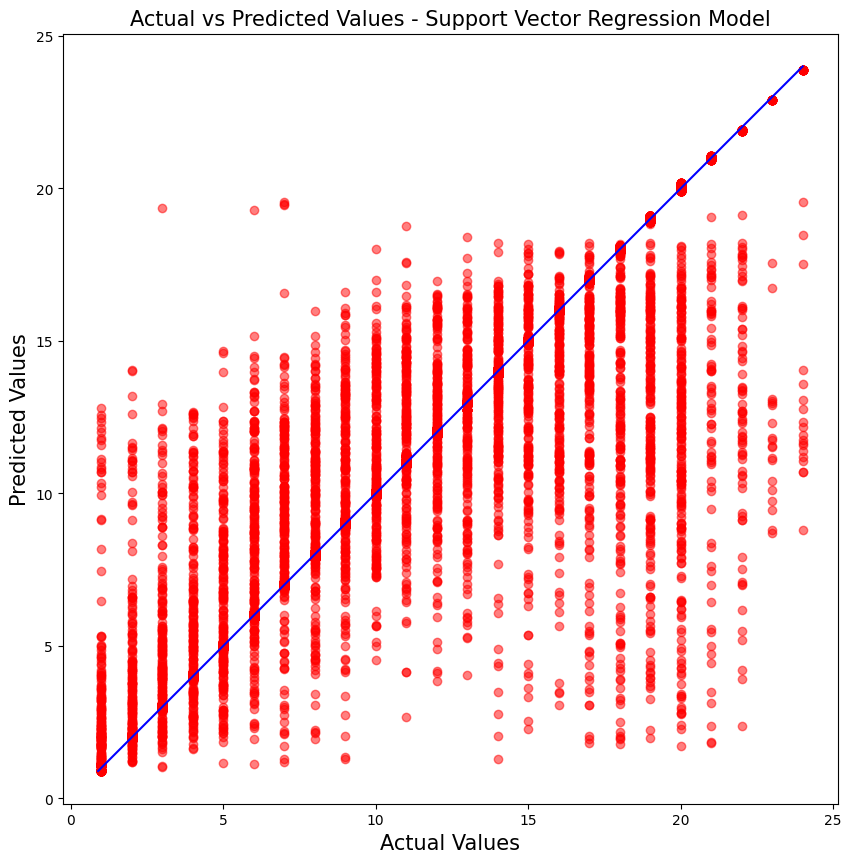

In [64]:
plt.figure(figsize=(10,10))
plt.scatter(y_train, predictions, c='red', alpha=0.5)
plt.yscale('linear')
plt.xscale('linear')
p1 = max(max(predictions), max(y_train))
p2 = min(min(predictions), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title('Actual vs Predicted Values - Support Vector Regression Model', fontsize=15)
plt.axis('equal')
plt.show()

### Модель регрессии с использованием нейронной сети

In [65]:
parameters={'hidden_layer_sizes': [(10,9,8,7,6,5), (15,10,5,3)], 
        'activation': ['relu'], 
        'solver': ['lbfgs'], 
        'alpha': np.logspace(-4,1,20)} 

for hidden_layer_sizes in parameters['hidden_layer_sizes']:
    for activation in parameters['activation']:
        for solver in parameters['solver']:
            for alpha in parameters['alpha']:
                model_parameters = (hidden_layer_sizes, activation, solver, alpha )
                model4 = MLPRegressor(hidden_layer_sizes = hidden_layer_sizes,
                                      activation = activation, solver = solver, alpha = alpha, random_state = 1, max_iter=100)
                model4.fit(X_train, y_train)

                model_score = regression(model4)

                compare['Reg_Model'].append('nn_regressor')
                compare['Reg_Params'].append(model_parameters)
                compare['Reg_Score'].append(model_score)

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

### Метрики для модели регрессии с использованием нейронной сети

In [66]:
predictions = model4.predict(X_train)
R2score=r2_score(y_train, predictions)
print('R² Value:', R2score)
MSE = metrics.mean_squared_error(y_train, predictions)
print('Mean squared error:', MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_train, predictions))
print('Root mean squared error:', RMSE)

R² Value: -5.233591338082988e-13
Mean squared error: 36.97112894054472
Root mean squared error: 6.080388880700372


### ROC-кривая для модели регрессии с использованием нейронной сети

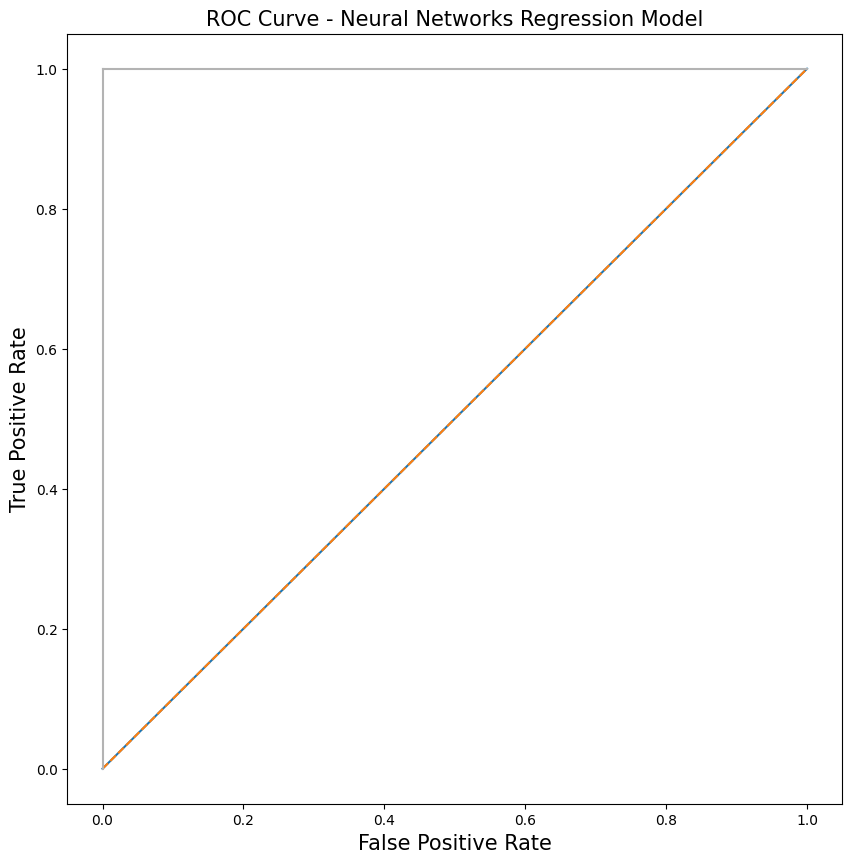

In [67]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions, pos_label=2)
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve - Neural Networks Regression Model', fontsize=15)
plt.plot(tpr, fpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.show()

### Реальные и предсказанные значения для модели регрессии с использованием нейронной сети

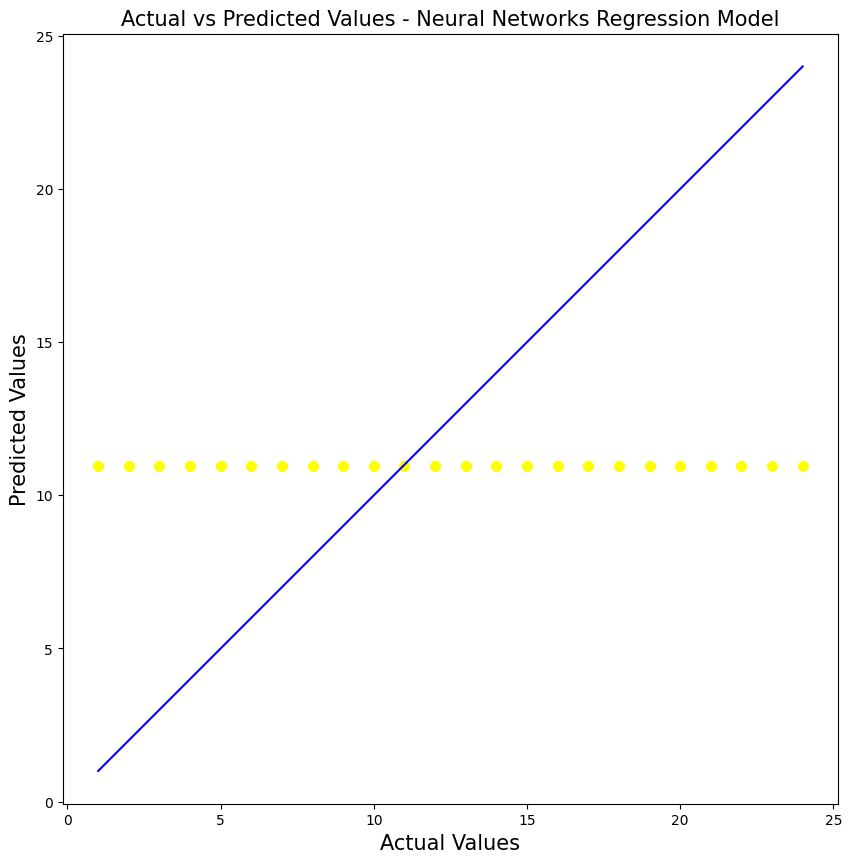

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(y_train, predictions, c='yellow', alpha=0.5)
plt.yscale('linear')
plt.xscale('linear')
p1 = max(max(predictions), max(y_train))
p2 = min(min(predictions), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title('Actual vs Predicted Values - Neural Networks Regression Model', fontsize=15)
plt.axis('equal')
plt.show()

## Сравнение моделей

In [70]:
new_compare = {}
new_compare['Reg_Model'] = compare['Reg_Model']
new_compare['Reg_Params'] = compare['Reg_Params']
new_compare['Reg_Score'] = compare['Reg_Score']
#groupby score of implemented models
df2 = pd.DataFrame(new_compare).groupby('Reg_Model')['Reg_Score'].max()
df2

Reg_Model
linear_regression          0.818182
nn_regressor               1.000000
random_forest_regressor    0.863636
svm_regressor              0.909091
Name: Reg_Score, dtype: float64

### График для сравнения метрик моделей

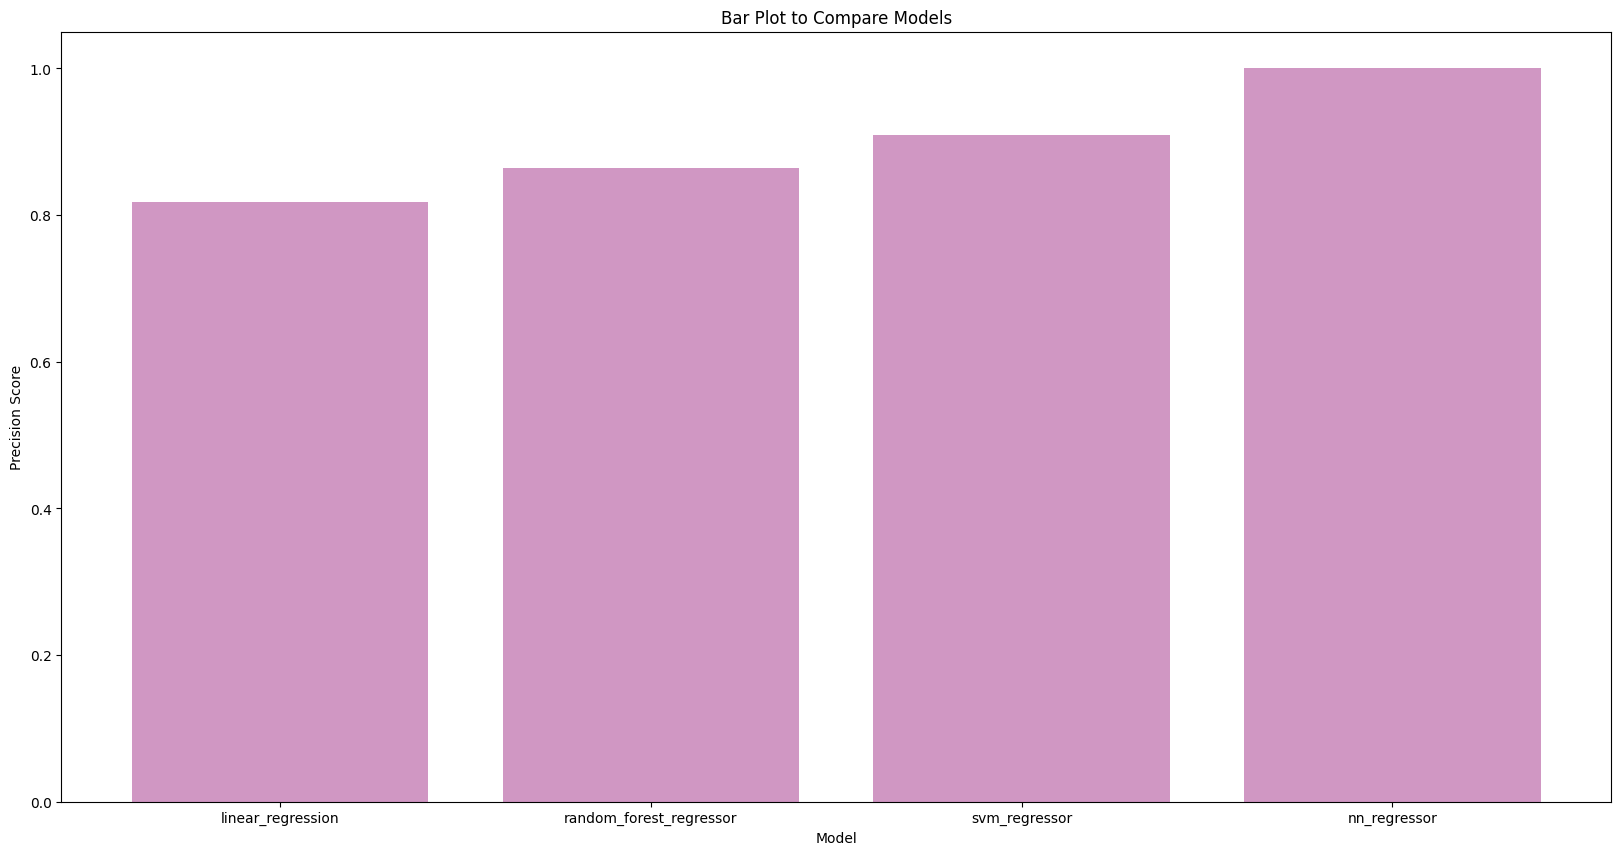

In [71]:
plt.figure(figsize=(20, 10))
plt.bar(new_compare['Reg_Model'], new_compare['Reg_Score'], color="#d097c3")
plt.xlabel('Model')
plt.ylabel("Precision Score")
plt.title('Bar Plot to Compare Models')
plt.show()

## Характеристики, влияющие на победу гонщика

### Слачайный лес

In [72]:
df_x = pd.DataFrame(columns=["Features", "Feature Importance"], data={"Features": X_train.columns, "Feature Importance":model2.feature_importances_})
df_x

,Features,Feature Importance
0,season,0.033395
1,round,0.097070
2,driver_points,0.226570
3,driver_wins,0.000122
4,driver_position,0.219310
5,constructor_points,0.167943
6,constructor_wins,0.032095
7,constructor_position,0.146734
8,driver_age,0.076761


<Axes: title={'center': 'Best Features- Random Forest Regressor Model'}, ylabel='Features'>

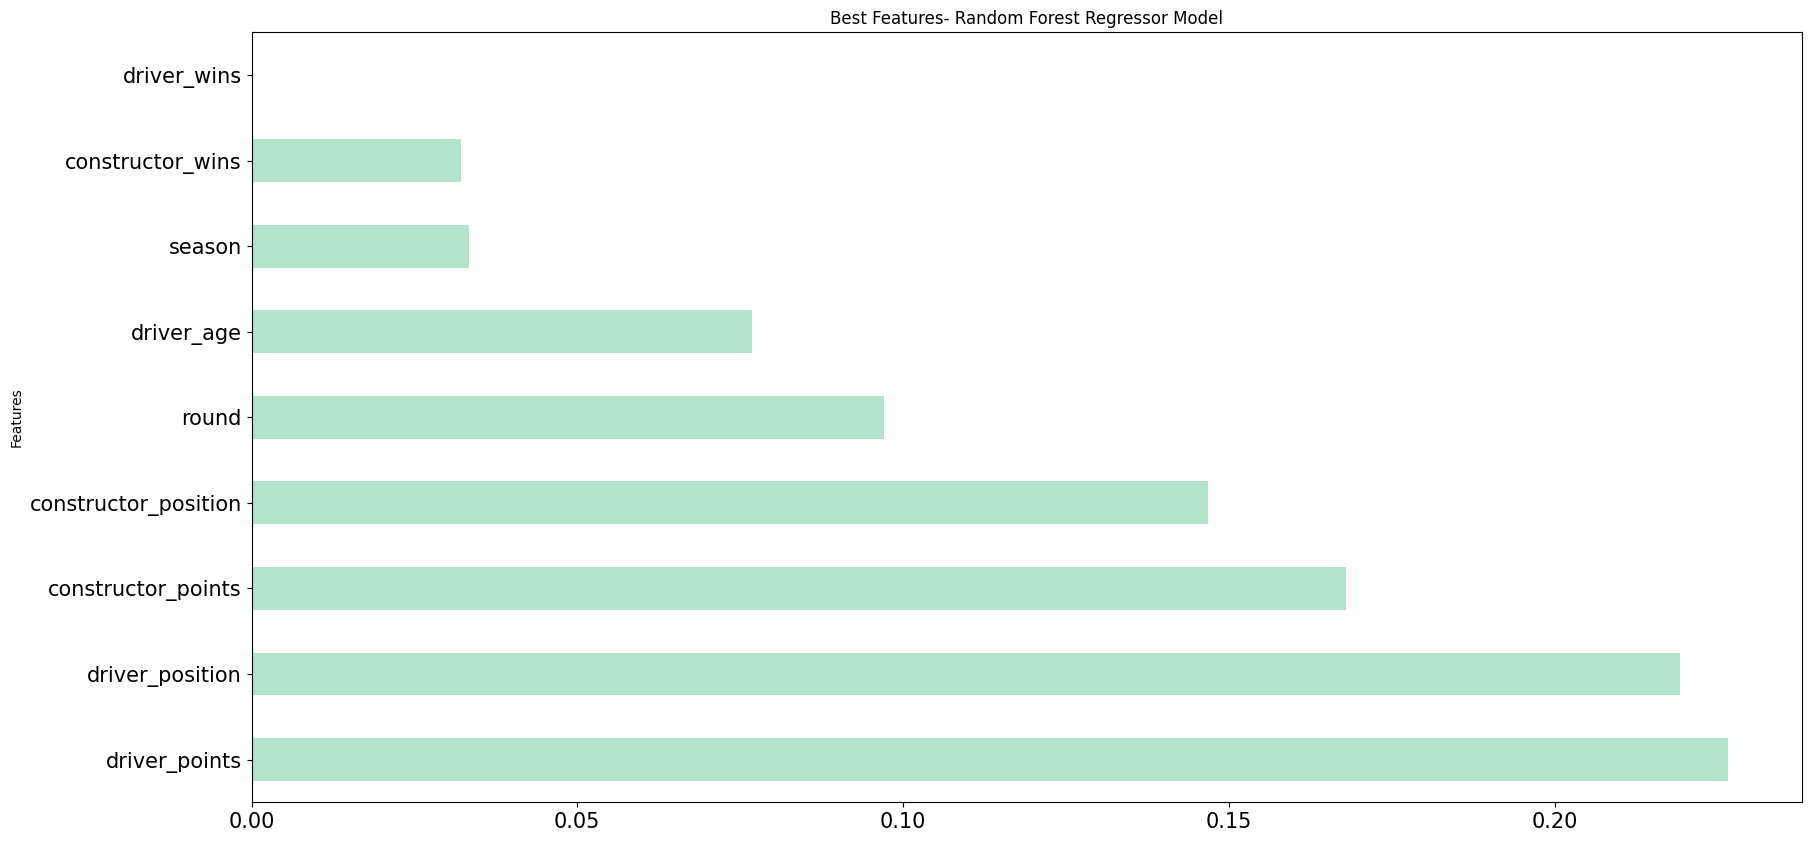

In [73]:
feature_importances2 = model2.feature_importances_

feat_importances = pd.Series(feature_importances2, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=[20, 10], title="Best Features- Random Forest Regressor Model", ylabel="Features", fontsize=15, colormap="Pastel2")

### Тестирование 
Функционаол сайта подразумевает, что пользователя ввел переменные (driver, season, round, driver_points, driver_wins, driver_position, constructor_points, constructor_wins, constructor_position, driver_age), а ему сайт выдает место, которое займет водитель в гонке

Тестирование я провожу на любом раунде 2023 сезона

In [74]:
test = main[(main.season == 2023) & (main['round'] == 10)] # здесь указываем раунд
X_test = test.drop(['driver', 'podium', 'circuit_id', 'country', 'nationality', 'constructor'], axis = 1)
y_test = test.podium

X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

pred = pd.DataFrame(model3.predict(X_test), columns = ['results'])
pred['podium'] = y_test.reset_index(drop = True)
pred['actual'] = pred.podium
pred.sort_values('results', ascending = True, inplace = True)
pred.reset_index(inplace = True, drop = True)
pred['predicted'] = pred.index
pred['predicted'] = pred.predicted.map(lambda x: 1 if x == 0 else x+1)

In [75]:
pred

,results,podium,actual,predicted
0,1.365117,1,1,1
1,2.075443,6,6,2
2,3.217301,3,3,3
3,3.461465,7,7,4
4,4.058535,5,5,5
5,5.233186,14,14,6
6,6.571176,9,9,7
7,6.631608,10,10,8
8,9.747042,2,2,9
9,9.836234,4,4,10
